# Evolving Niches with Noise
## Publication Images

In [9]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import seaborn as sns
import numpy as np

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -numpy
%aimport -logging
%aimport -os

from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
import analysis.ks
# plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D17_nonoise_300x50', '20D17_g0_c012_i1_300x50',
               '20D22_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D23_g300_c012_i1_600x50']
base_runs = [None, None, 104, 125, 105]
experiment_names = ['1','2','3a','3b','3c']

species = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories]
# spectra = [pd.read_parquet(os.path.join(directory_base, d, 'encoded_spectrum.parquet')) for d in directories]

# spectra_ob_fitness = []
# for i, (spectrum, specy) in enumerate(zip(spectra,species)):
#     gens = range(289,299)
#     if i >= 2:
#         gens = range(589,599)
#     last_10_species = specific_generation_over_runs(gens, data=specy)
#     run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
#     run_fitness = run_role_fitness.groupby('run').mean()
#
#     sof = spectrum.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
#     sof = sof.drop(columns='fitness')
#     spectra_ob_fitness.append(sof)

idx = pd.IndexSlice

## Subspecies counts

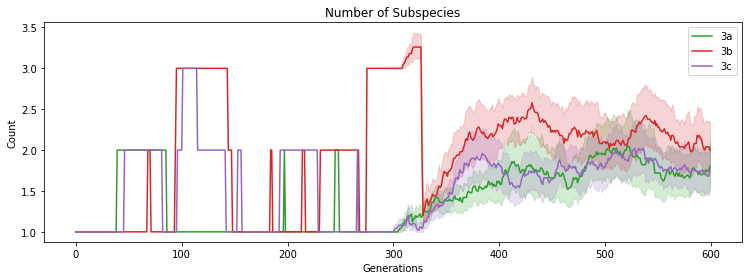

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `n_subspecies_sender.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `n_subspecies_receiver.pdf'.


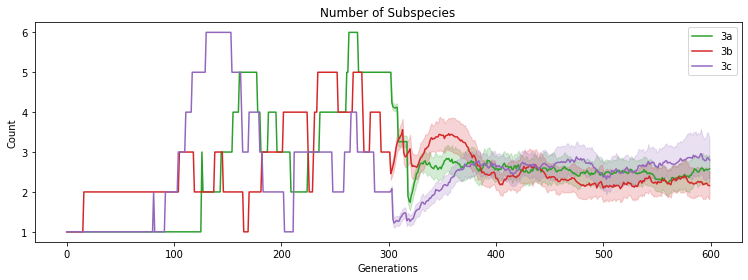

In [3]:
# for role in ['sender', 'receiver']:
#     with sns.color_palette(sns.color_palette()[2:]):
#         fig, axis = plt.subplots(1, 1, figsize=(10.5,4))
#         for experiment, specy in zip(experiment_names[2:], species[2:]):
#             visualize.dataframe.plot_subspecies_count(specy, role=role, view=False, filename=None, close=False, label=experiment)
#
#         filename = 'n_subspecies_{}.svg'.format(role)
#         pdf_filename = 'n_subspecies_{}.pdf'.format(role)
#         plt.legend()
#         plt.savefig(filename)
#         plt.show()
#
#         # !cairosvg {filename} -o {pdf_filename}
#         # !pdfcrop {pdf_filename} {pdf_filename}

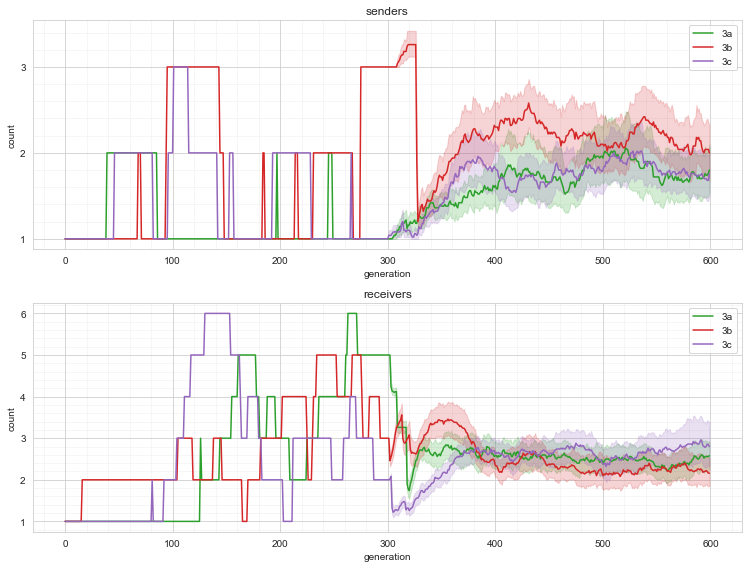

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `n_subspecies.pdf'.


In [38]:
fig, axes = plt.subplots(2, 1, figsize=(10.5,8))
for role, ax in zip(['sender', 'receiver'], axes):
    ax.set_prop_cycle(color=sns.color_palette()[2:])
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.grid(b=True, which='major')
    ax.grid(which='minor', alpha=0.2)
    for experiment, specy in zip(experiment_names[2:], species[2:]):
        fig.sca(ax)
        # with sns.color_palette(sns.color_palette()[2:]):
        visualize.dataframe.plot_subspecies_count(specy, role=role, view=False, filename=None, close=False,
                                                      label=experiment, title='{}s'.format(role))

filename = 'n_subspecies.svg'
pdf_filename = 'n_subspecies.pdf'
plt.legend()
plt.savefig(filename)
plt.show()

# !cairosvg {filename} -o {pdf_filename}
# !pdfcrop {pdf_filename} {pdf_filename}

## Network stats

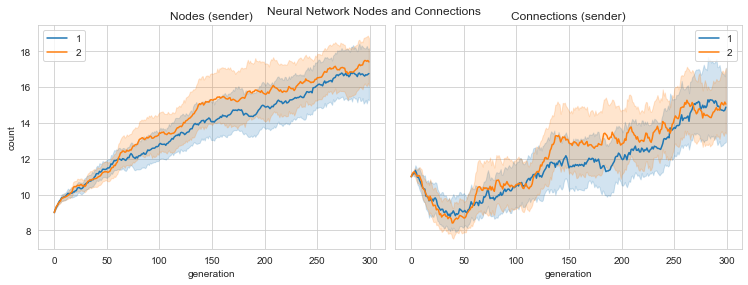

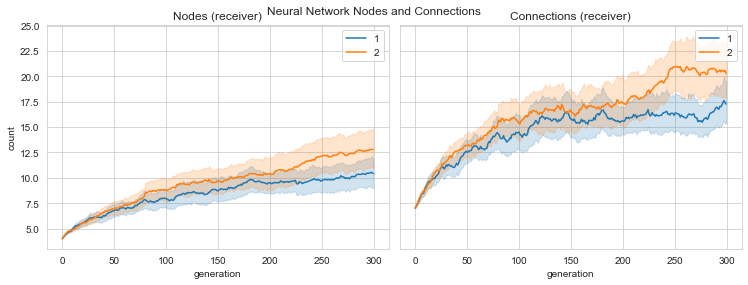

In [15]:
sns.set_style("whitegrid")

for role in ['sender', 'receiver']:
    fig, axes = plt.subplots(1, 2, figsize=(10.5,4), sharey=True)
    for experiment, specy in zip(experiment_names[:2], species[:2]):
        visualize.dataframe.plot_network_stats(specy, role=role, view=False, filename=None, close=False, axes=axes, label=experiment)

    filename = 'network_stats_constant_{}.svg'.format(role)
    pdf_filename = 'network_stats_constant_{}.pdf'.format(role)
    plt.legend()
    plt.savefig(filename)
    plt.show()

    # !cairosvg {filename} -o {pdf_filename}
    # !pdfcrop {pdf_filename} {pdf_filename}

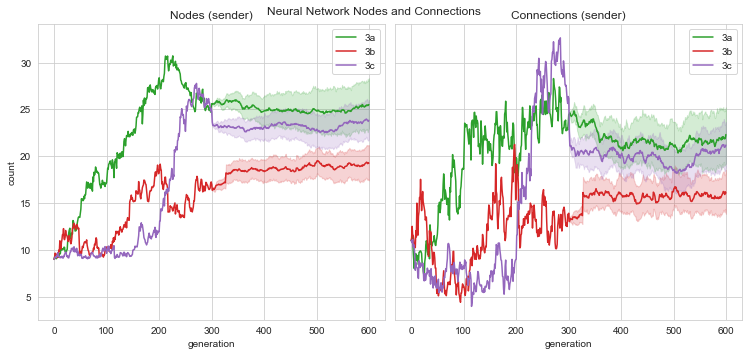

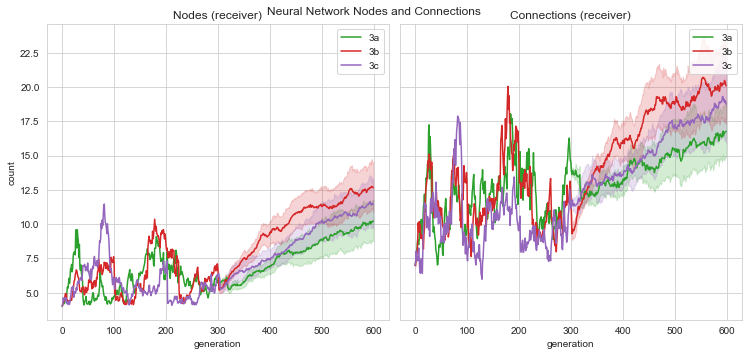

In [16]:
sns.set_style("whitegrid")

# paired = sns.color_palette('Paired')
# paired = paired[:2] + paired[6:8] + paired[2:6] + paired[8:]

# for role in ['sender', 'receiver']:
#     with sns.color_palette(sns.color_palette()[2:]):
#         fig, axes = plt.subplots(1, 2, figsize=(10.5,5), sharey=True)
#         for experiment, specy in zip(experiment_names[2:], species[2:]):
#             visualize.dataframe.plot_network_stats(specy, role=role, view=False, filename=None, close=False, axes=axes, label=experiment)
#
#         filename = 'network_stats_{}.svg'.format(role)
#         pdf_filename = 'network_stats_{}.pdf'.format(role)
#         plt.legend()
#         plt.savefig(filename)
#         plt.show()

        # !cairosvg {filename} -o {pdf_filename}
        # !pdfcrop {pdf_filename} {pdf_filename}

2020-06-17 23:57:24,109 - MainThread - matplotlib.legend - WARNING - No handles with labels found to put in legend.


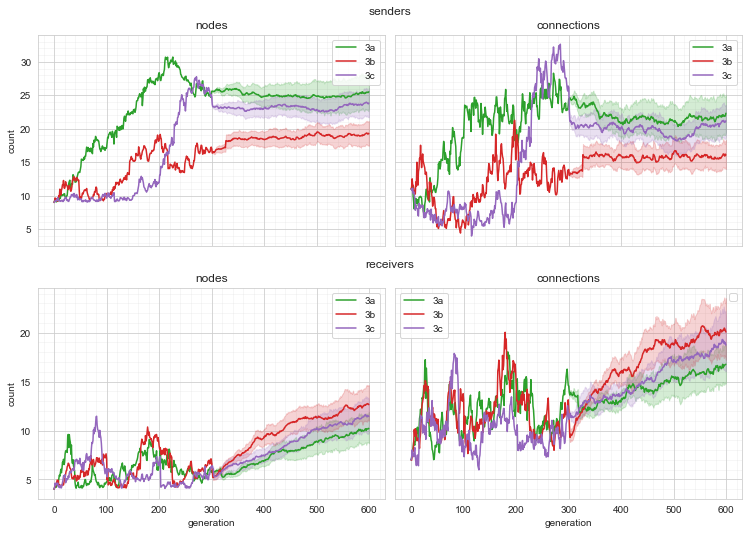

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `network_stats.pdf'.


In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10.5,8), sharex=True, sharey='row')

for i, role in enumerate(['sender', 'receiver']):
    axs = axes[i,:]
    for ax in axs:
        ax.set_prop_cycle(color=sns.color_palette()[2:])
        ax.xaxis.set_minor_locator(MultipleLocator(20))
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.yaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(5))
        ax.grid(b=True, which='major')
        ax.grid(which='minor', alpha=0.2)
    for experiment, specy in zip(experiment_names[2:], species[2:]):
        visualize.dataframe.plot_network_stats(specy, role=role, view=False, filename=None, close=False, axes=axs, label=experiment)

ax_senders = fig.add_subplot(211, frame_on=False)
ax_senders.tick_params(labelcolor="none", bottom=False, left=False)
ax_senders.set_title('senders', pad=20, fontsize='large')
ax_senders.grid(b=False)
ax_receivers = fig.add_subplot(212, frame_on=False)
ax_receivers.tick_params(labelcolor="none", bottom=False, left=False)
ax_receivers.set_title('receivers', pad=20, fontsize='large')
ax_receivers.grid(b=False)

fig.subplots_adjust(top=0.875, hspace=0.2)

filename = 'network_stats.svg'
pdf_filename = 'network_stats.pdf'
plt.legend()
plt.savefig(filename)
plt.show()

!cairosvg {filename} -o {pdf_filename}
!pdfcrop {pdf_filename} {pdf_filename}